# Parallel simulations

[![Download JupyterNotebook](https://img.shields.io/badge/Download-Notebook-orange?style=for-the-badge&logo=Jupyter)](https://raw.githubusercontent.com/ANNarchy/ANNarchy.github.io/master/notebooks/MultipleNetworks.ipynb) [![Download JupyterNotebook](https://img.shields.io/badge/Open_in-Colab-blue?style=for-the-badge&logo=Jupyter)](https://colab.research.google.com/github/ANNarchy/ANNarchy.github.io/blob/master/notebooks/MultipleNetworks.ipynb)

In [1]:
#!pip install ANNarchy

This example demonstrates the use of `parallel_run()` to simulate the same network multiple times in parallel. 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import ANNarchy as ann

ANNarchy 4.8 (4.8.3) on darwin (posix).


Parallel simulations use the ``multiprocessing`` module to start parallel processes. On Linux, it should work directly, but there is an issue on OSX. Since Python 3.8, the 'spawn' method is the default way to start processes, but it does not work on MacOS. The following cell should fix the issue, but it should only be ran once.

In [3]:
import platform
if platform.system() == "Darwin":
    import multiprocessing as mp
    mp.set_start_method('fork')

We start by creating the Izhikevich pulse-coupled network defined in [Izhikevich.ipynb](https://raw.githubusercontent.com/ANNarchy/ANNarchy.github.io/master/notebooks/Izhikevich.ipynb), but using a class inheriting from `ann.Network`:

In [4]:
class PulseNetwork(ann.Network):

    def __init__(self, size=1000, seed=-1):

        if seed >=0 :
            self.set_seed(seed)

        # Create the population
        self.P = self.create(geometry=size, neuron=ann.Izhikevich)

        # Create the excitatory population
        nb_exc = int(0.8*size)
        self.Exc = self.P[:nb_exc]
        re = np.random.random(nb_exc)
        self.Exc.noise = 5.0
        self.Exc.a = 0.02
        self.Exc.b = 0.2
        self.Exc.c = -65.0 + 15.0 * re**2
        self.Exc.d = 8.0 - 6.0 * re**2
        self.Exc.v = -65.0
        self.Exc.u = self.Exc.v * self.Exc.b

        # Create the Inh population
        self.Inh = self.P[nb_exc:]
        ri = np.random.random(size - nb_exc)
        self.Inh.noise = 2.0
        self.Inh.a = 0.02 + 0.08 * ri
        self.Inh.b = 0.25 - 0.05 * ri
        self.Inh.c = -65.0
        self.Inh.d = 2.0
        self.Inh.v = -65.0
        self.Inh.u = self.Inh.v * self.Inh.b

        # Create the projections
        proj_exc = self.connect(self.Exc, self.P, 'exc')
        proj_inh = self.connect(self.Inh, self.P, 'inh')

        proj_exc.connect_all_to_all(weights=ann.Uniform(0.0, 0.5))
        proj_inh.connect_all_to_all(weights=ann.Uniform(0.0, 1.0))

        # Create a spike monitor
        self.M = self.monitor(self.P, 'spike')


We create such a network and 

()
{}


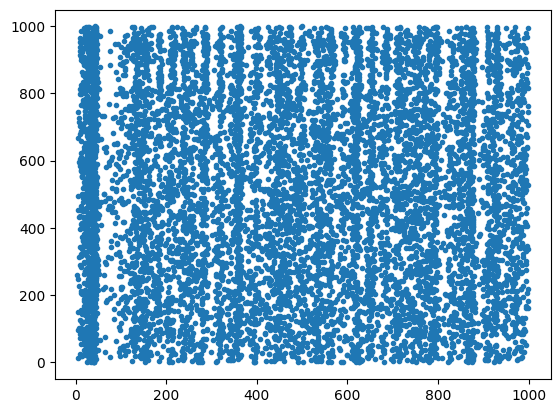

In [5]:
# Create network
net = PulseNetwork(1000)
net.compile()


# Single trial
def run(net, duration):
    # Simulate
    net.simulate(duration)
    # Recordings
    t, n = net.M.raster_plot()
    return t, n

t, n = run(net, 1000)
plt.plot(t, n, '.')

In [6]:
results = net.parallel_run(method=run, number=8, duration=[1000 for _ in range(8)])

# Data analysis
plt.figure(figsize=(15, 15))
for i in range(8):
    t, n = results[i]
    plt.subplot(4, 2, i+1)
    plt.plot(t, n, '.')
plt.show()

()()()()()()()()







{}{}{}{}{}{}{}{}









TypeError: float() argument must be a string or a real number, not 'list'

In [10]:
ann.NetworkManager()

Number of registered networks = 2
Network 0 (MagicNetwork)
  populations = []
  projections = []
  monitors = []
  extensions = []
  cyInstance = None at 0x1050a5d00
Network 1 
  populations = [Population at 0x127cfec90, ]
  projections = [Projection at 0x13318d610, Projection at 0x13318c470, ]
  monitors = [Monitor at 0x13318c8c0, ]
  extensions = []
  cyInstance = <module 'ANNarchyCore1' from '/Users/vitay/Research/ANNarchy/documentation/notebooks/annarchy//ANNarchyCore1.dylib'> at 0x1331a1b70